In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'D:\Files\GoogleDrive\My writings\Onlinenotes\MachineLearning\ml23\contents\3':
  os.chdir(r'D:\Files\GoogleDrive\My writings\Onlinenotes\MachineLearning\ml23\contents\3')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\Xinli\AppData\Local\Temp\ipykernel_23476\3358677143.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\importlib\\_bootstrap.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\importlib\\_bootstrap_external.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\codecs.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\encodings\\aliases.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\encodings\\__init__.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\encodings\\utf_8.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\encodings\\cp1252.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\abc.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\io.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\stat.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\_collections_abc.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\genericpath.py": 1680645435

In [2]:
import pandas as pd
def gini(S):
    N = len(S)
    y = S[:, -1].reshape(N)
    gini = 1 - ((pd.Series(y).value_counts()/N)**2).sum()
    return gini

In [3]:
def split(G):
    m = G.shape[0]
    gmini = gini(G)
    pair = None
    if gini(G) != 0:
        numOffeatures = G.shape[1] - 1
        for k in range(numOffeatures):
            for t in range(m):
                Gl = G[G[:, k] <= G[t, k]]
                Gr = G[G[:, k] > G[t, k]]
                gl = gini(Gl)
                gr = gini(Gr)
                ml = Gl.shape[0]
                mr = Gr.shape[0]
                g = gl*ml/m + gr*mr/m
                if g < gmini:
                    gmini = g
                    pair = (k, G[t, k])
                    Glm = Gl
                    Grm = Gr
        res = {'split': True,
               'pair': pair,
               'sets': (Glm, Grm)}
    else:
        res = {'split': False,
               'pair': pair,
               'sets': G}
    return res

In [4]:
import pandas as pd
def countlabels(S):
    y = S[:, -1].reshape(S.shape[0])
    labelCount = dict(pd.Series(y).value_counts())
    return labelCount

In [5]:
from sklearn.datasets import load_iris
import numpy as np
from assests.codes.dt import gini, split, countlabels

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target
y = y.reshape((y.shape[0],1))
S = np.concatenate([X,y], axis=1)

print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
r = split(S)
if r['split'] is True:
    Gl, Gr = r['sets']
    print(r['pair'])
    print('The left subset\'s Gini impurity is {g:.2f},'.format(g=gini(Gl)),
          ' and its label counts is {d:}'.format(d=countlabels(Gl)))
    print('The right subset\'s Gini impurity is {g:.2f},'.format(g=gini(Gr)),
          ' and its label counts is {d}'.format(d=countlabels(Gr)))

(0, 1.9)
The left subset's Gini impurity is 0.00,  and its label counts is {0.0: 50}
The right subset's Gini impurity is 0.50,  and its label counts is {1.0: 50, 2.0: 50}


In [7]:
r = split(Gr)
if r['split'] is True:
    Grl, Grr = r['sets']
    print(r['pair'])
    print('The left subset\'s Gini impurity is {g:.2f},'.format(g=gini(Grl)),
          ' and its label counts is {d:}'.format(d=countlabels(Grl)))
    print('The right subset\'s Gini impurity is {g:.2f},'.format(g=gini(Grr)),
          ' and its label counts is {d}'.format(d=countlabels(Grr)))

(1, 1.7)
The left subset's Gini impurity is 0.17,  and its label counts is {1.0: 49, 2.0: 5}
The right subset's Gini impurity is 0.04,  and its label counts is {2.0: 45, 1.0: 1}


In [8]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2, random_state=40)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=40)

[Text(0.4, 0.8333333333333334, 'x[1] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'x[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

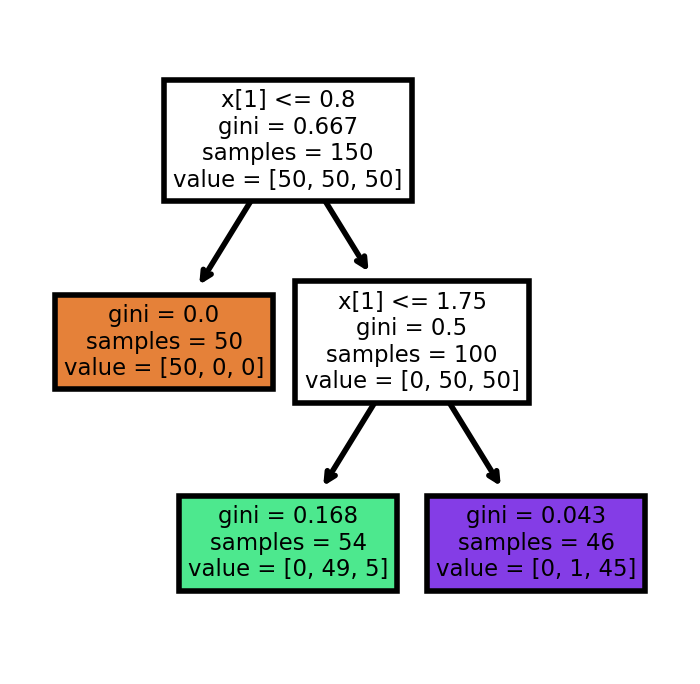

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2, 2), dpi=200)
tree.plot_tree(clf, filled=True, impurity=True)

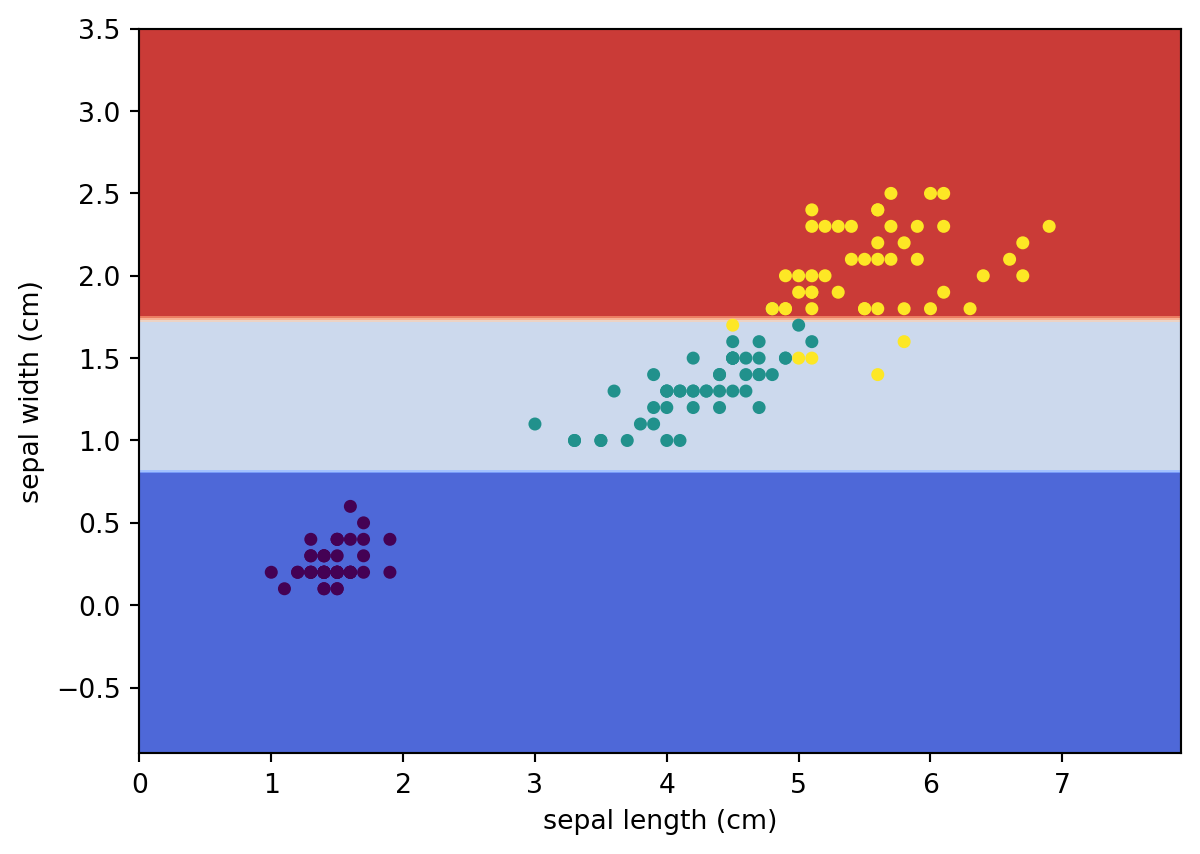

In [10]:
from sklearn.inspection import DecisionBoundaryDisplay
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap='coolwarm',
    response_method="predict",
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, s=15)

In [11]:
import pandas as pd

df = pd.DataFrame(X)
df.head()

,0,1
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [12]:
df1 = df[df[0]<=1.9]
df2 = df[df[1]<=0.8]

In [13]:
df1sorted = df1.sort_values(by=df1.columns.tolist()).reset_index(drop=True)
df2sorted = df2.sort_values(by=df2.columns.tolist()).reset_index(drop=True)
print(df1sorted.equals(df2sorted))

True


In [14]:
dfr = df[df[0]>1.9]
df2a = dfr[dfr[1]>1.7]
df2b = dfr[dfr[1]<=1.7]
print(df2b[1].max())
print(df2a[1].min())

1.7
1.8


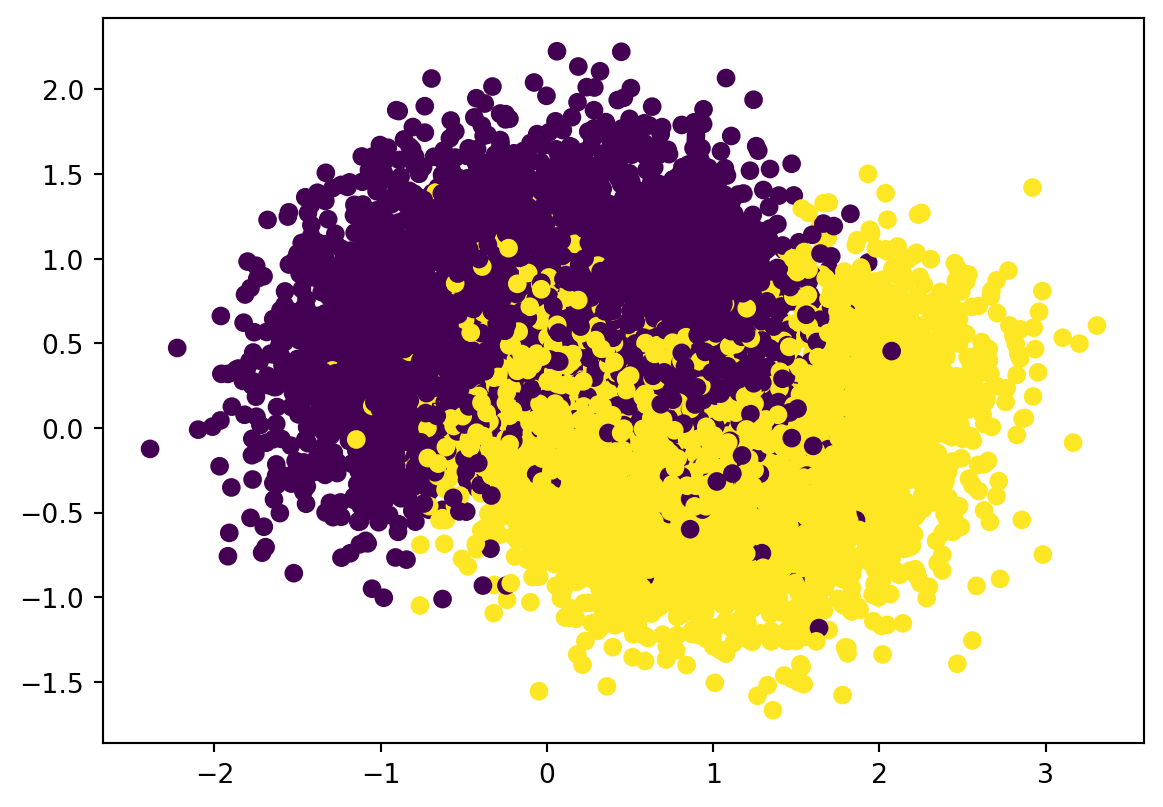

In [15]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)
plt.scatter(x=X[:, 0], y=X[:, 1], c=y)

In [16]:
# Step 1
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Step 3
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np

params = {'min_samples_split': list(range(2, 5)),
          'max_leaf_nodes': list(range(2, 50))}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                              params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [18]:
# Step 4
from sklearn.metrics import accuracy_score

clf = grid_search_cv.best_estimator_
print(grid_search_cv.best_params_)
y_pred = clf.predict(X_test)
accuracy_score(y_pred, y_test)

{'max_leaf_nodes': 17, 'min_samples_split': 2}


0.8695

[Text(0.5340909090909091, 0.9375, 'x[1] <= 0.296\ngini = 0.5\nsamples = 8000\nvalue = [3987, 4013]'),
 Text(0.25, 0.8125, 'x[0] <= -0.476\ngini = 0.367\nsamples = 4275\nvalue = [1036, 3239]'),
 Text(0.09090909090909091, 0.6875, 'x[0] <= -0.764\ngini = 0.183\nsamples = 472\nvalue = [424, 48]'),
 Text(0.045454545454545456, 0.5625, 'gini = 0.035\nsamples = 333\nvalue = [327, 6]'),
 Text(0.13636363636363635, 0.5625, 'x[1] <= 0.047\ngini = 0.422\nsamples = 139\nvalue = [97, 42]'),
 Text(0.09090909090909091, 0.4375, 'gini = 0.496\nsamples = 70\nvalue = [38, 32]'),
 Text(0.18181818181818182, 0.4375, 'gini = 0.248\nsamples = 69\nvalue = [59, 10]'),
 Text(0.4090909090909091, 0.6875, 'x[1] <= -0.062\ngini = 0.27\nsamples = 3803\nvalue = [612, 3191]'),
 Text(0.3181818181818182, 0.5625, 'x[1] <= -0.371\ngini = 0.147\nsamples = 2426\nvalue = [194, 2232]'),
 Text(0.2727272727272727, 0.4375, 'gini = 0.079\nsamples = 1336\nvalue = [55, 1281]'),
 Text(0.36363636363636365, 0.4375, 'gini = 0.223\nsamples

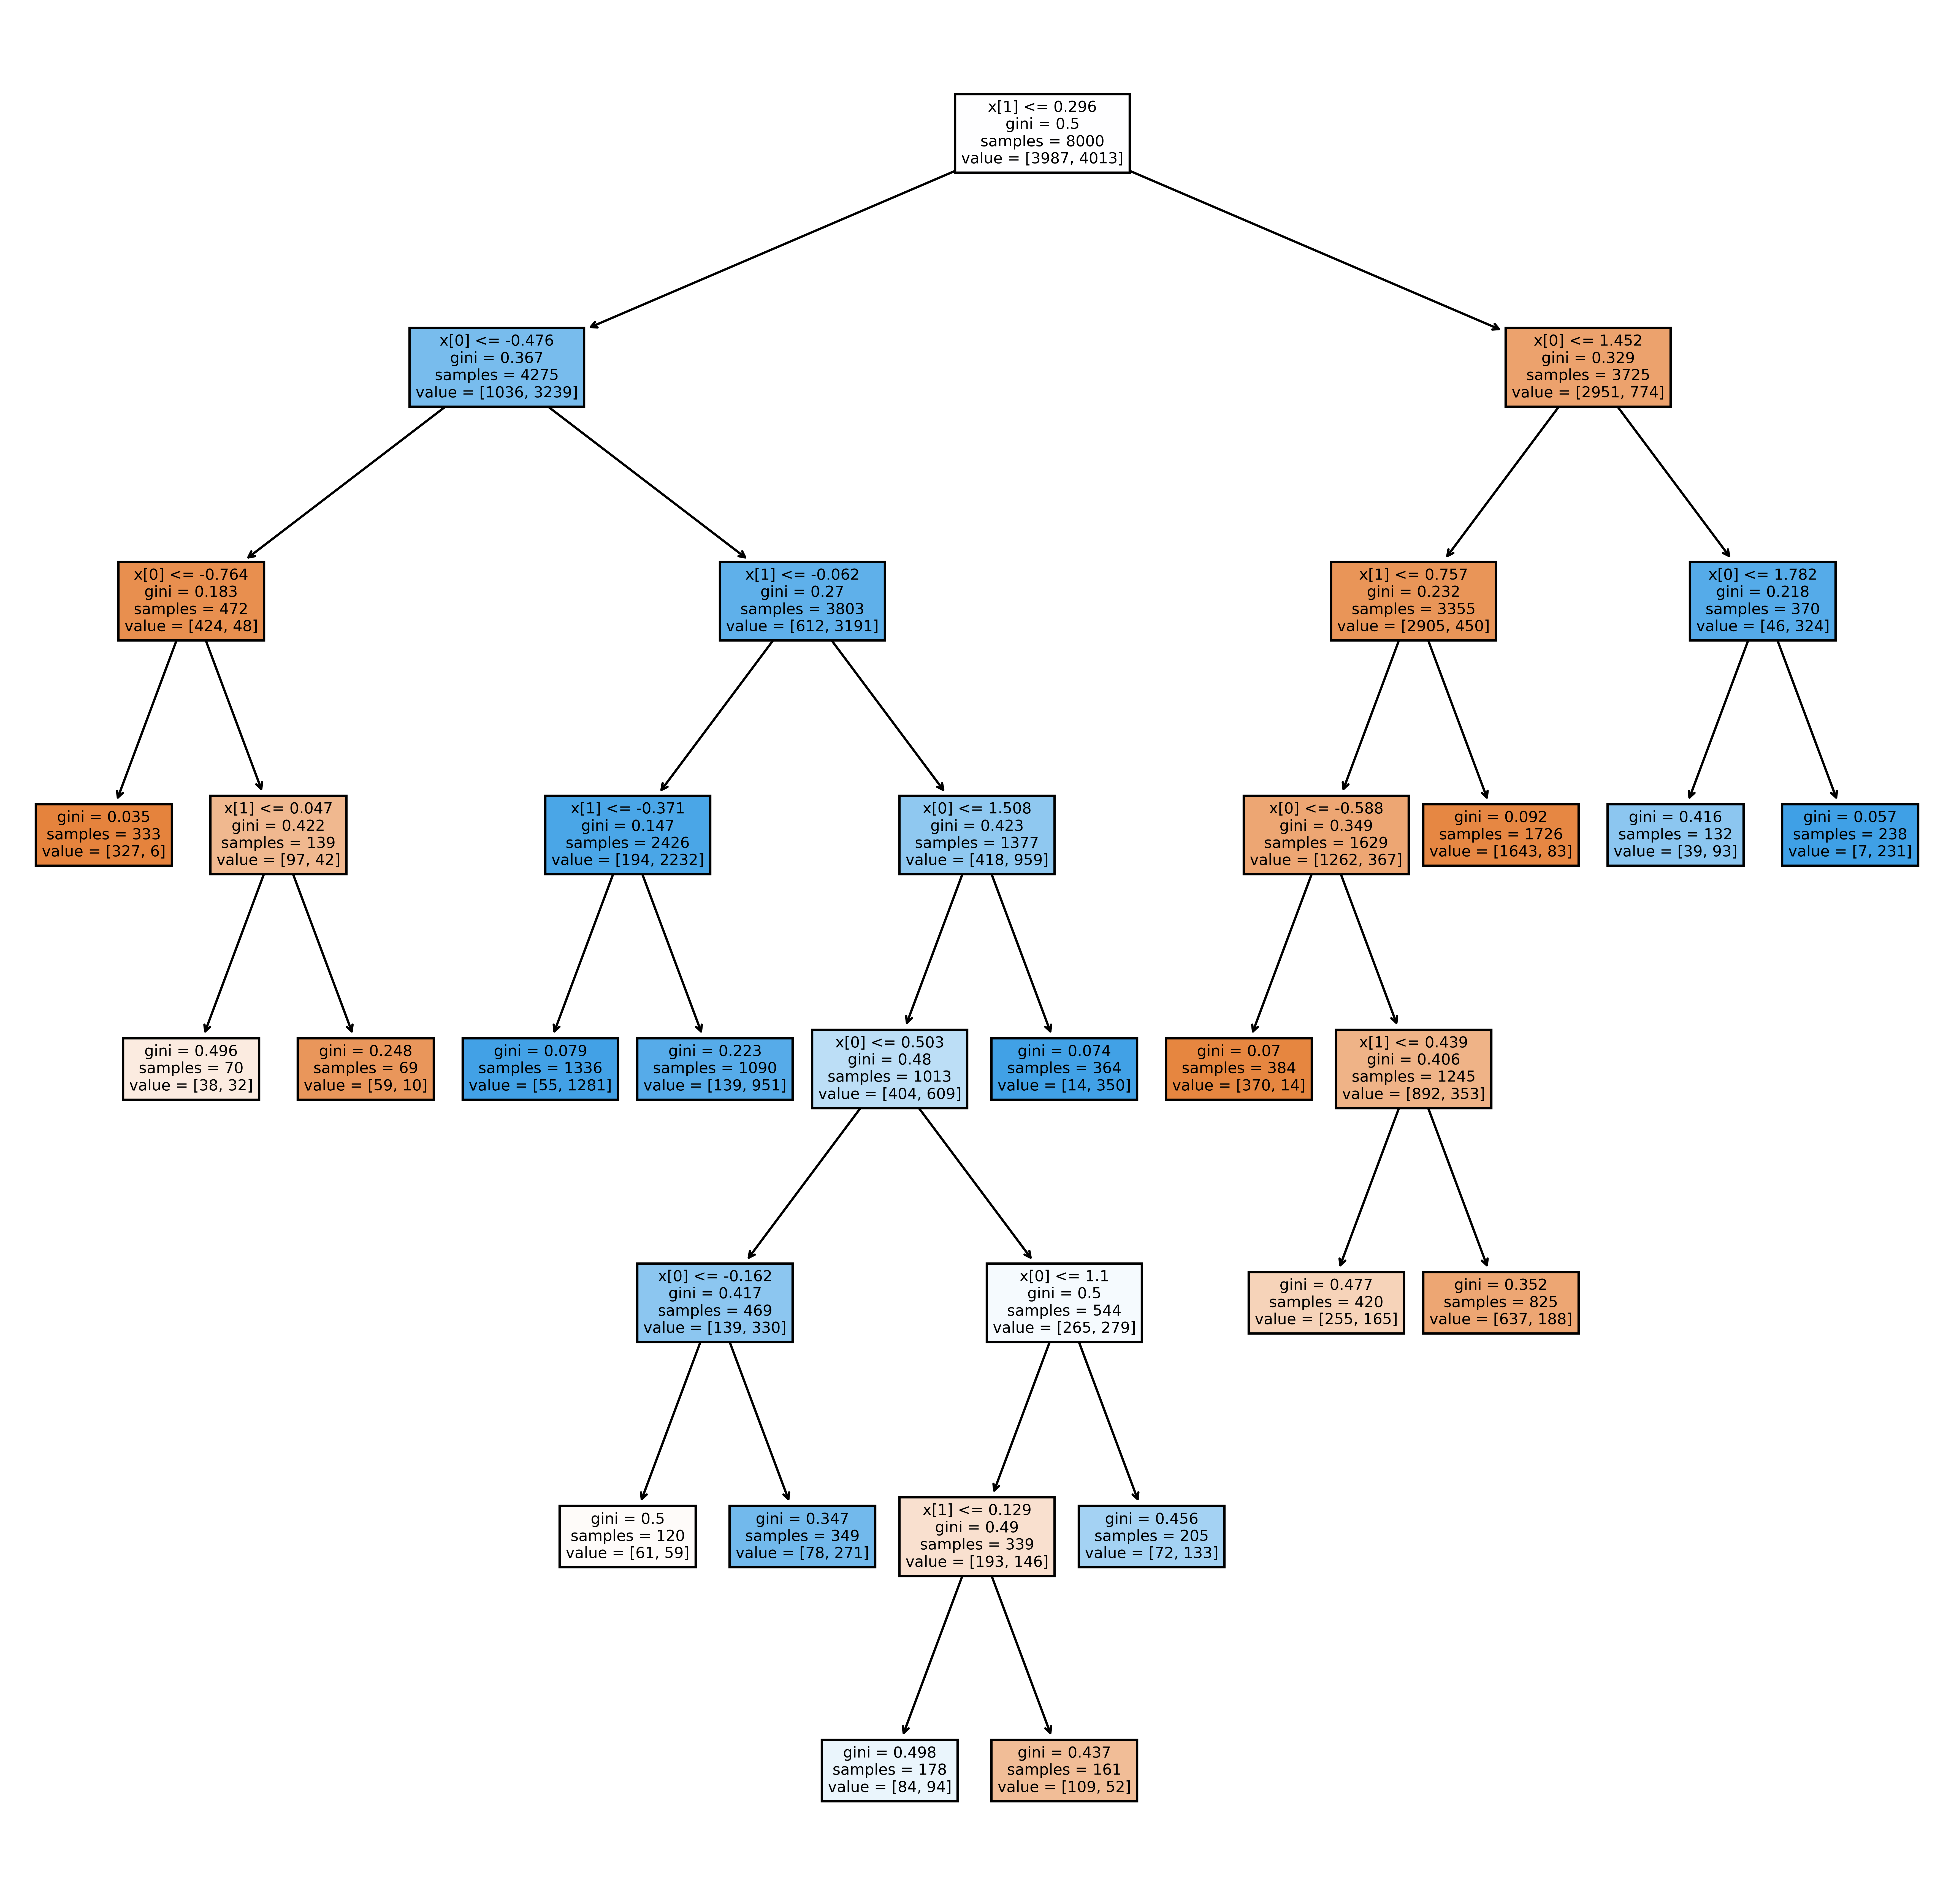

In [19]:
from sklearn import tree
plt.figure(figsize=(15, 15), dpi=300)
tree.plot_tree(clf, filled=True)

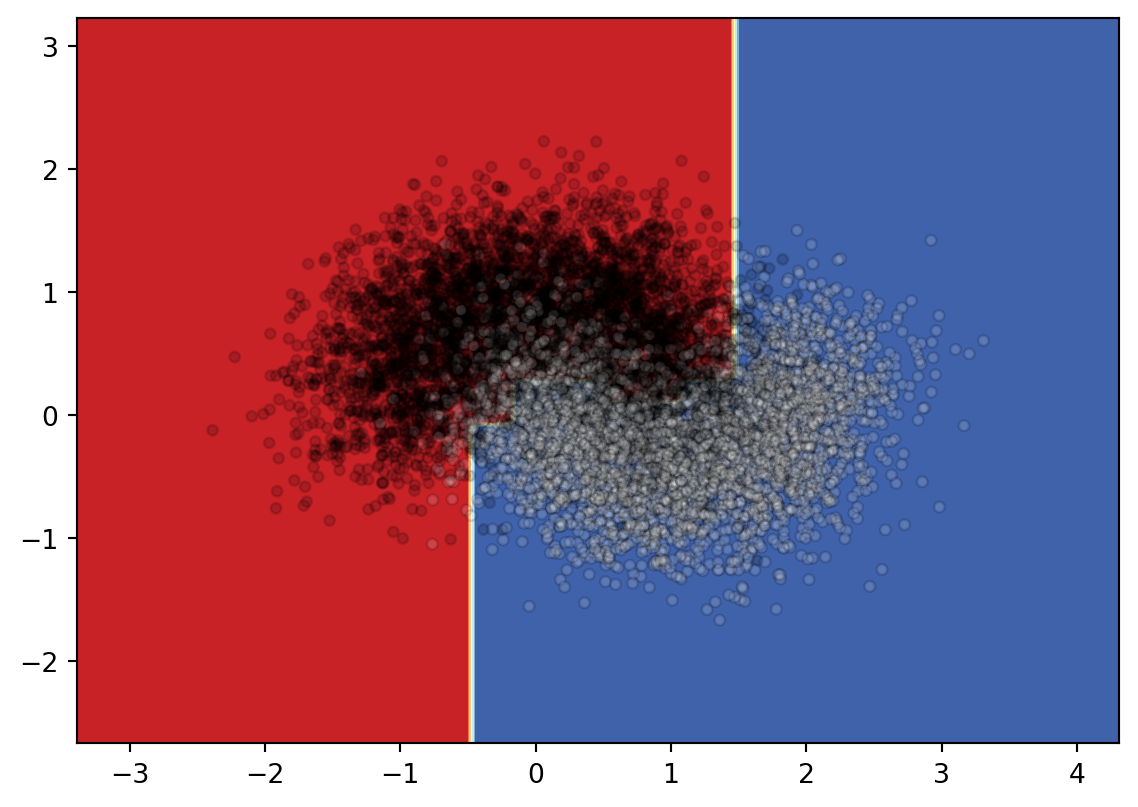

In [20]:
from sklearn.inspection import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=plt.cm.RdYlBu,
    response_method="predict"
)
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=y,
    cmap='gray',
    edgecolor="black",
    s=15,
    alpha=.15)

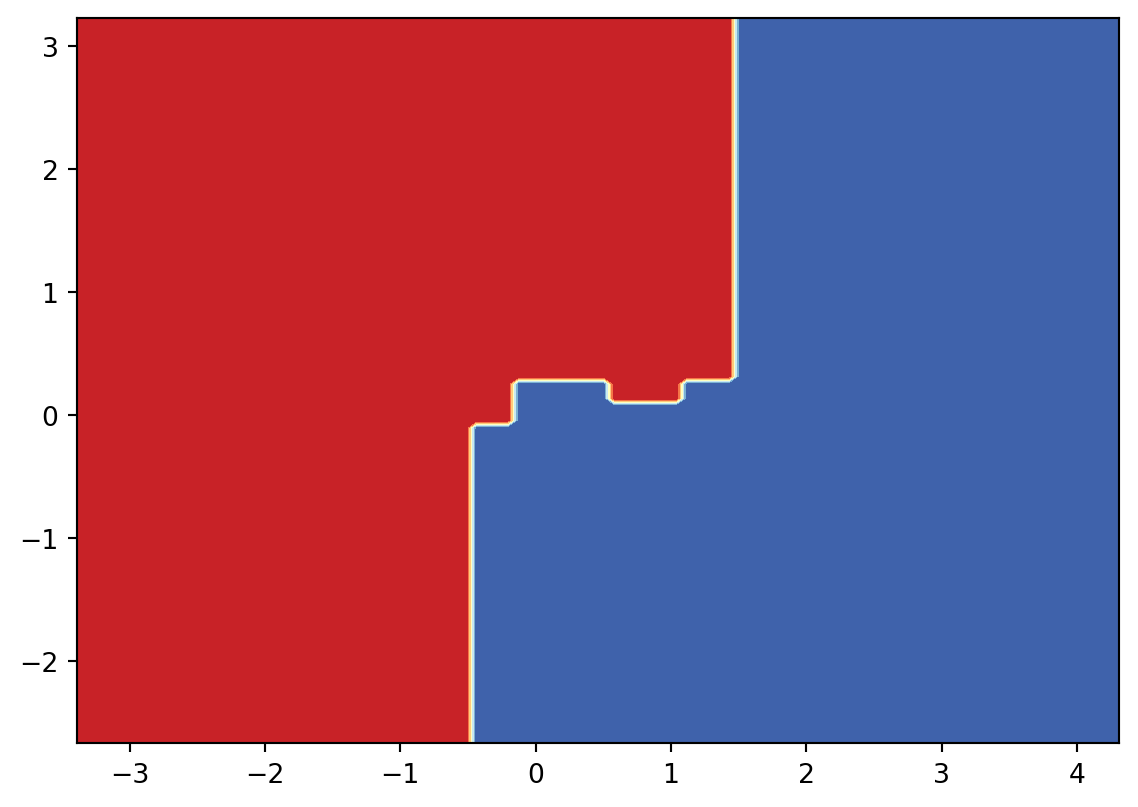

In [21]:
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=plt.cm.RdYlBu,
    response_method="predict"
)

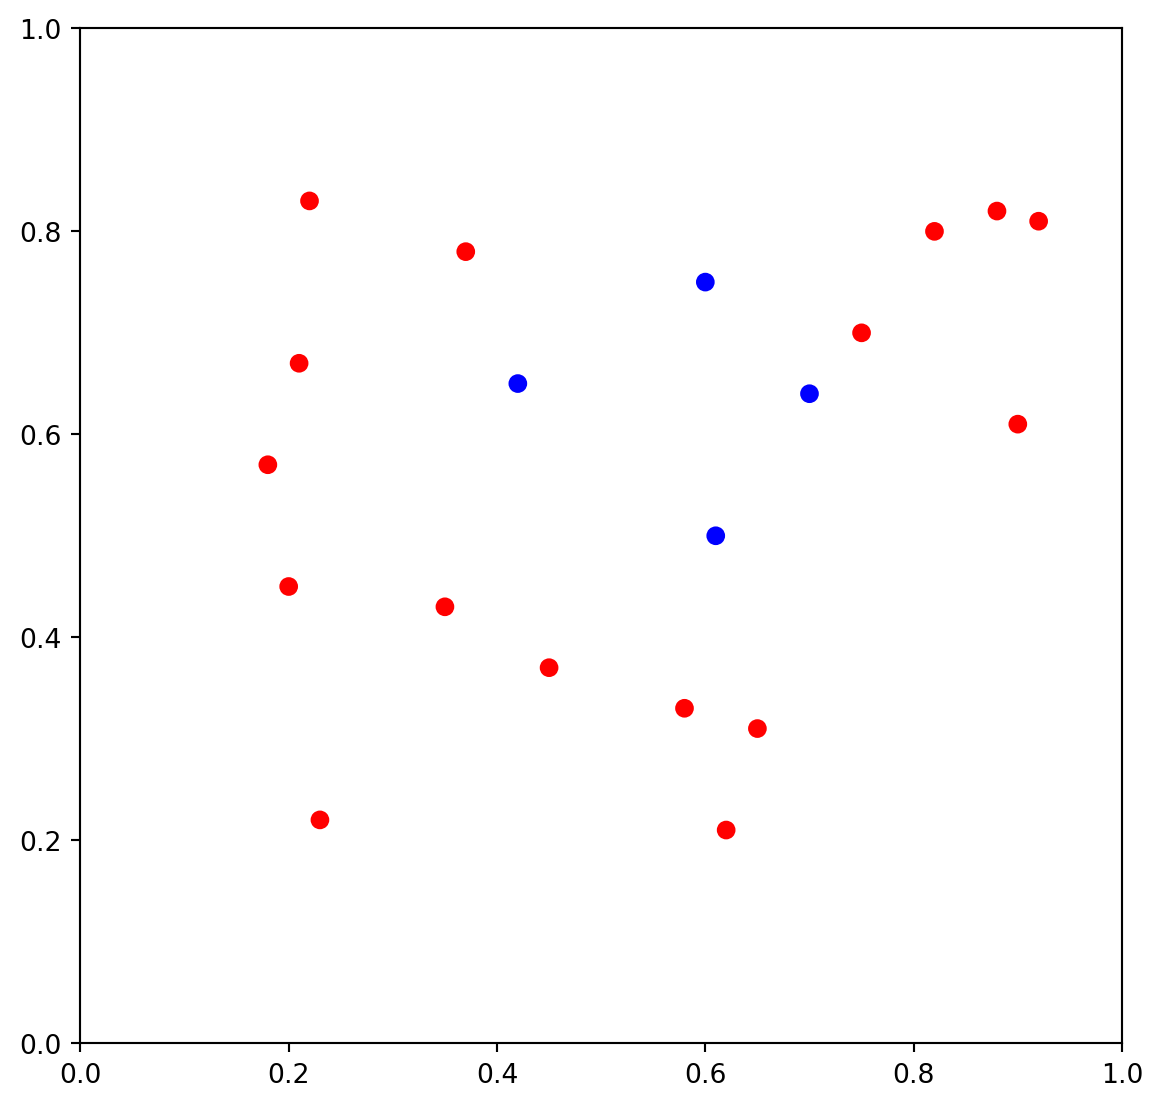

In [22]:
#| echo: false
import pandas as pd
import matplotlib.pyplot as plt
data = {'x0': [0.22, 0.37, 0.42, 0.45, 0.18, 0.20, 0.21, 0.23, 0.35, 0.58,
               0.60, 0.61, 0.62, 0.65, 0.70, 0.75, 0.82, 0.88, 0.90, 0.92],
        'x1': [0.83, 0.78, 0.65, 0.37, 0.57, 0.45, 0.67, 0.22, 0.43, 0.33,
               0.75, 0.50, 0.21, 0.31, 0.64, 0.70, 0.80, 0.82, 0.61, 0.81],
        'y': ['r', 'r', 'b', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 
              'b', 'b', 'r', 'r', 'b', 'r', 'r', 'r', 'r', 'r']}
df = pd.DataFrame(data)

plt.figure(figsize=(7, 7))
plt.scatter(df['x0'], df['x1'], c=df['y'])
_ = plt.xlim(0, 1)
_ = plt.ylim(0, 1)